* **Steps to follow**
   * Data upload
   * Get information about dataset with info
   * detection of null values
   * Detecting anomalies in the distribution of variables with identification
   * Filling meaningless 0 values with mean or median depending on the distribution of the variable
   * Detection and suppression of outliers

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
data=pd.read_csv("diabetes.csv")
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It appears that all values in the dataset are in numeric form

In [5]:
#detection of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

dataset contains no null values

In [6]:
#I will use the describe method to get statistical information (min,max, count,mean ...) about the variables in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* In the dataset, it is observed that the min values of Glucose, BloodPressure, SkinThickness, Insulin, and BMI variables are 0
* Since this is not possible in terms of health, these values will be filled with mean or median values according to the distribution of the variables.

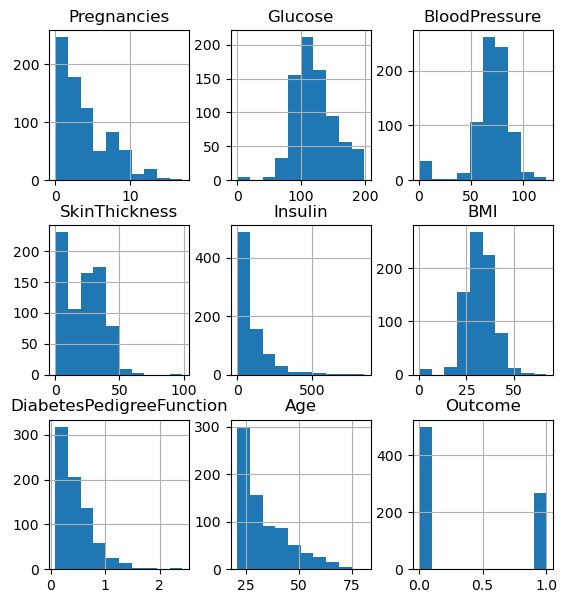

In [7]:
#examination of distributions of variables;
df.hist(bins=10,figsize=(6.5,7));

* Looking at the graphs above:
* Glucose, blood pressure, and BMI values are observed to have a normal distribution.
* Pregnancy,DiabetesPedigree, Age,Insulin, and SkinThickness variables are observed to show skewness

* min 0 values, considering the above distributions:
* Glucose, BMI, and Blood Pressure -->with average
* SkinThickness and Insulin -> will be filled with a median

In [8]:
df["Glucose"]=df["Glucose"].apply(lambda x:np.mean(df["Glucose"]) if x==0 else x)
df["BloodPressure"]=df["BloodPressure"].apply(lambda x:np.mean(df["BloodPressure"]) if x==0 else x)
df["BMI"]=df["BMI"].apply(lambda x:np.mean(df["BMI"]) if x==0 else x)

df["SkinThickness"]=df["SkinThickness"].apply(lambda x:np.median(df["SkinThickness"]) if x==0 else x)
df["Insulin"]=df["Insulin"].apply(lambda x:np.median(df["Insulin"]) if x==0 else x)

#Re-examination of min values:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


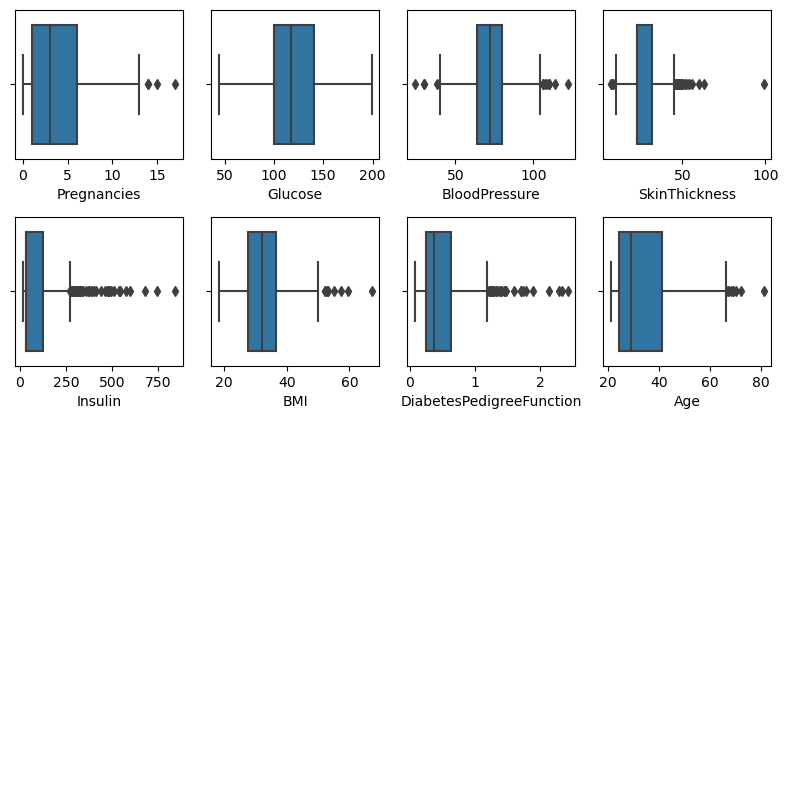

In [9]:
#I will draw a boxplot for each variable to detect outliers:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
df_2 = df.iloc[:,:-1]
columns = df_2.columns

for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        sns.boxplot(x=columns[i], data=df_2, ax=ax)
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

* Pregnancies, Insulin, BMI, DiabetesPedigreeFunction, and Age upper outliers only exist

* No outliers in Glucose

* There are outliers in BloodPressure and SkinThickness both below the lower limit and above the upper limit.

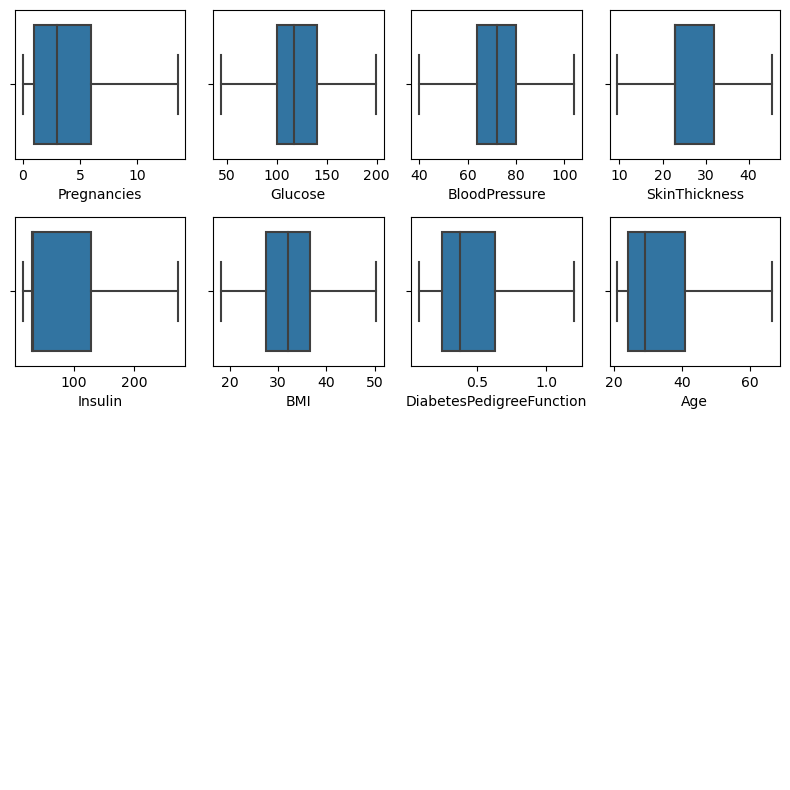

In [10]:
# suppression of outliers:
def suppress_outliers(columns,df):
    Q1=df[columns].quantile(0.25)
    Q3=df[columns].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q1-1.5*IQR
    lower_limit=Q3+1.5*IQR
    df[columns]=df[columns].apply(lambda x:upper_limit if x<upper_limit else x)
    df[columns]=df[columns].apply(lambda x:lower_limit if x>lower_limit else x)
    
df_2=df.iloc[:,:-1]
columns =df_2.columns

for column in columns :
    suppress_outliers(column,df)
    
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
df_2 = df.iloc[:,:-1]
columns = df_2.columns

for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        sns.boxplot(x=columns[i], data=df_2, ax=ax)
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
df.iloc[:,:-1]=df_2
df.to_csv("Cleaning_Data.csv")